# DBSCAN project
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we will use the [Wholesale customers dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) and create a DBSCAN model to help better understand this dataset.

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset exploration

In [2]:
sales_df = pd.read_csv('data/wholesome_customers_data.csv')
sales_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Does not have nan values
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
sales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
print(f"Values for Channel {sales_df['Channel'].unique()}")
print(f"Values for Region {sales_df['Region'].unique()}")

Values for Channel [2 1]
Values for Region [3 1 2]


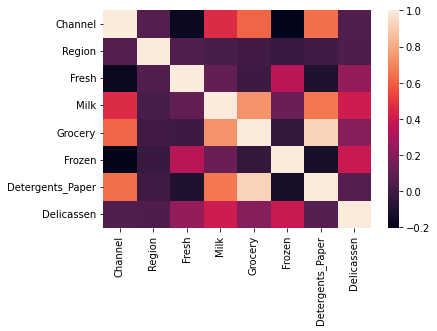

In [6]:
# Let's see correlations
sns.heatmap(sales_df.corr());

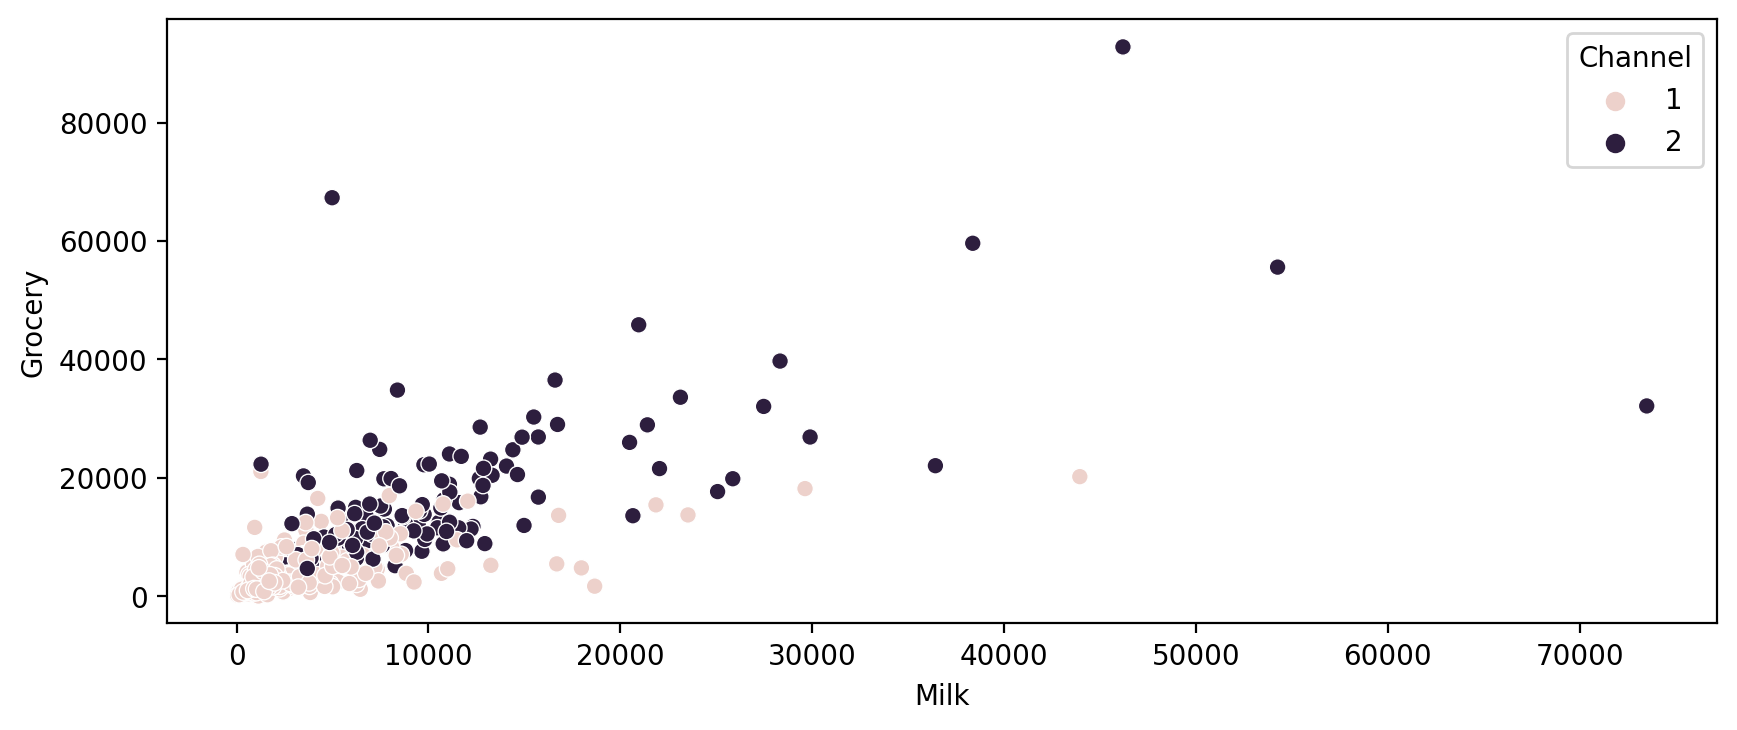

In [7]:
# Relationship between Milk and Grocery
plt.figure(figsize=(10,4), dpi=200);
sns.scatterplot(data=sales_df, x='Milk', y='Grocery', hue='Channel');

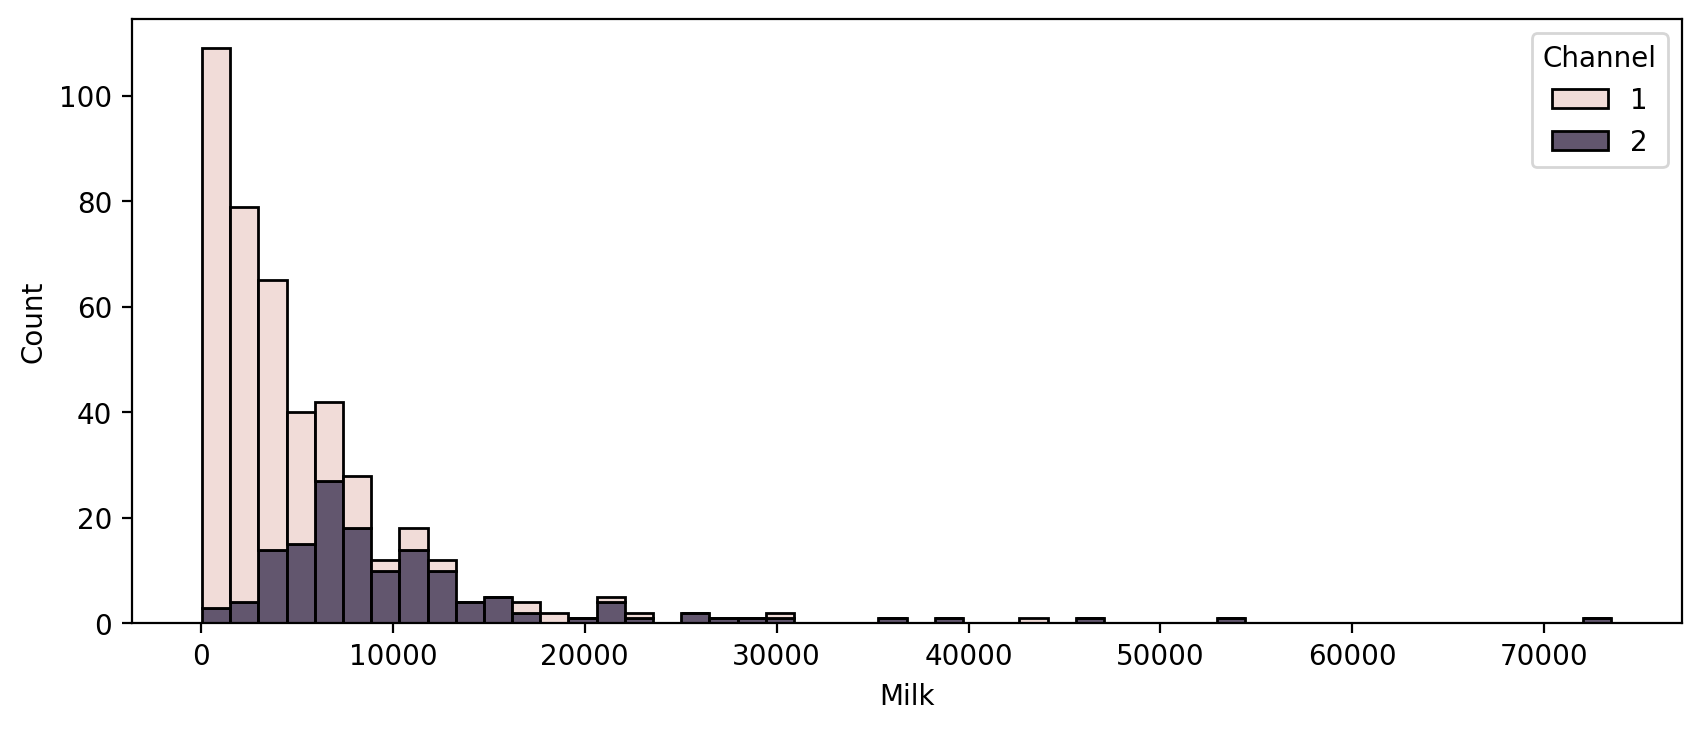

In [8]:
plt.figure(figsize=(10,4), dpi=200);
sns.histplot(sales_df, x='Milk', hue='Channel', multiple="stack");

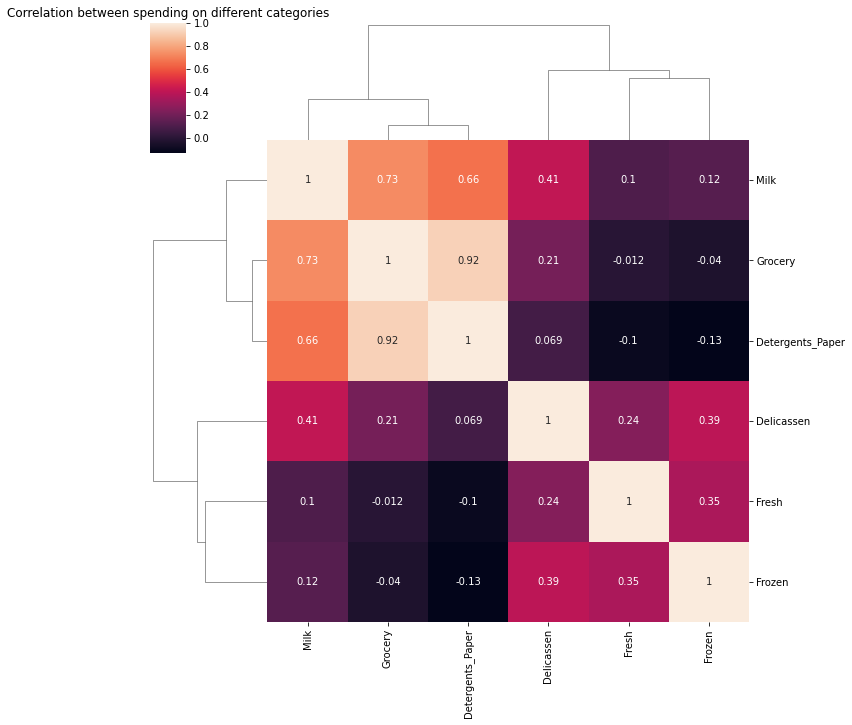

In [9]:
# Clustermap of the correlations between spending on different categories
sns.clustermap(sales_df.drop(["Region", "Channel"], axis=1).corr(), annot=True);
plt.title("Correlation between spending on different categories");

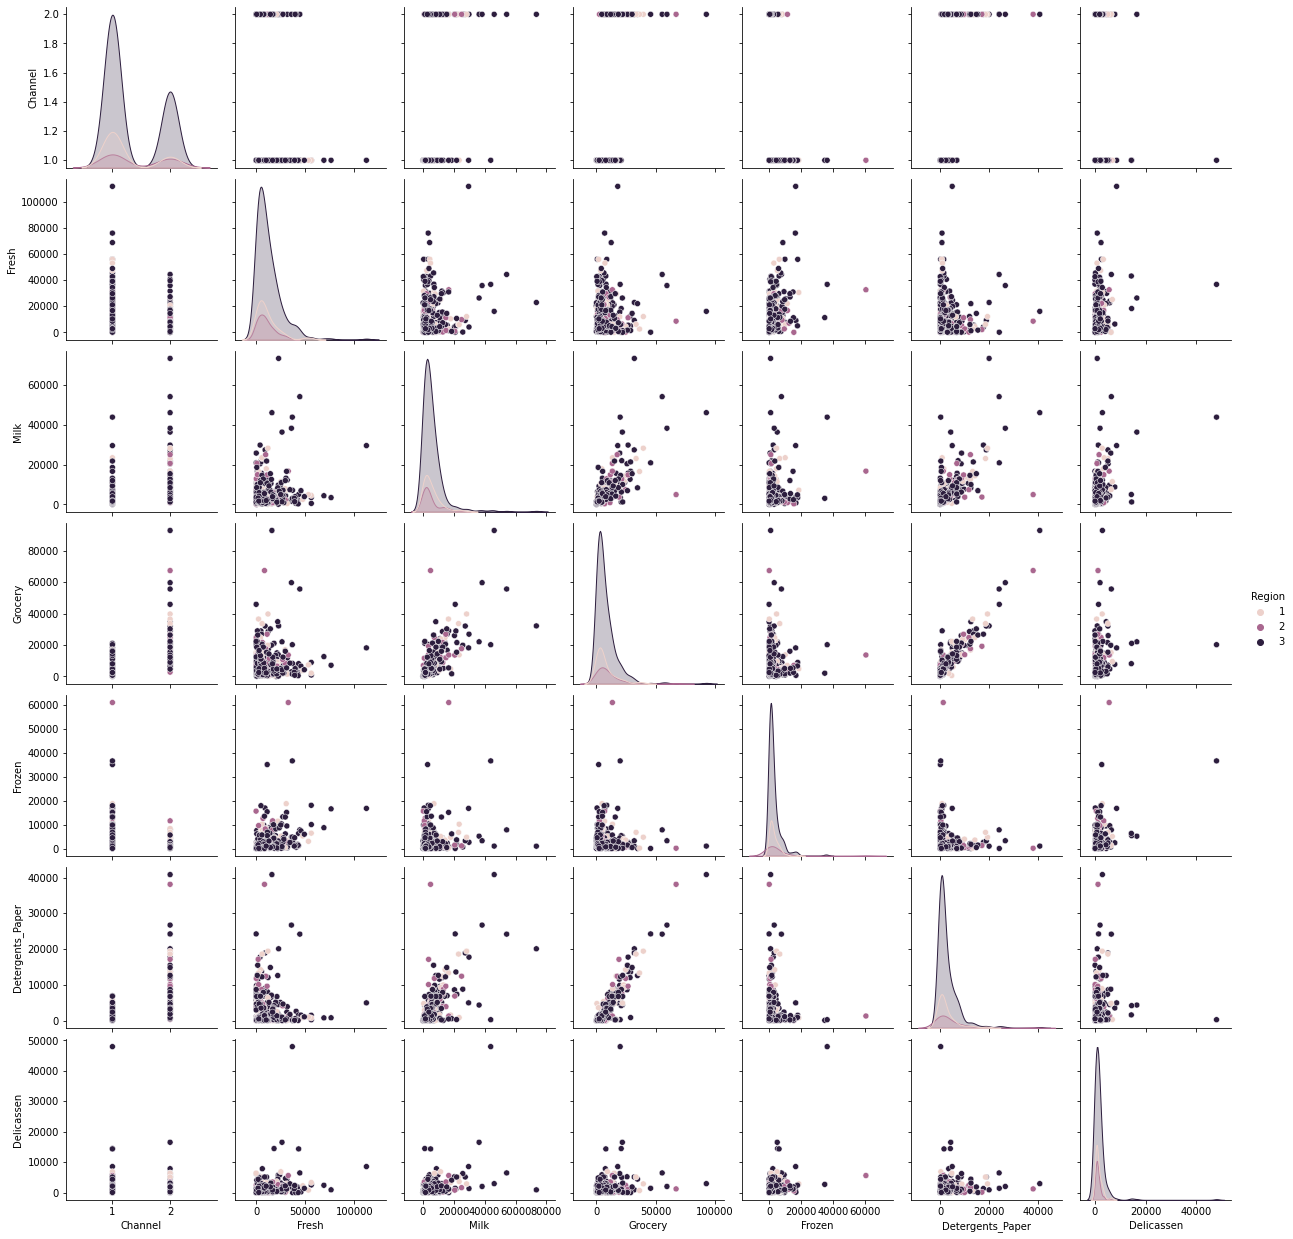

In [10]:
sns.pairplot(sales_df, hue="Region")

## Model creation

In [11]:
# First we need to scaled the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(sales_df)

In [12]:
# Creation of the DBSCAN model. Let's try different epsilon values

from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.001, 3, 50):
    
    # we create and fit the model
    dbscan = DBSCAN(eps=eps, min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
    # save percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

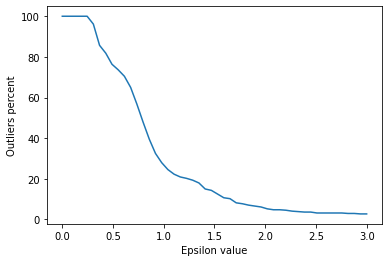

In [13]:
# Let's check those outliers percent

sns.lineplot(x=np.linspace(0.001, 3, 50), y=outlier_percent);
plt.xlabel("Epsilon value");
plt.ylabel("Outliers percent");

In [14]:
## An epsilon of 2 seems reasonable

dbscan_model = DBSCAN(eps=2, min_samples=2*scaled_X.shape[1])
dbscan_model.fit(scaled_X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=16, n_jobs=None, p=None)

## Visualizations with the new labels

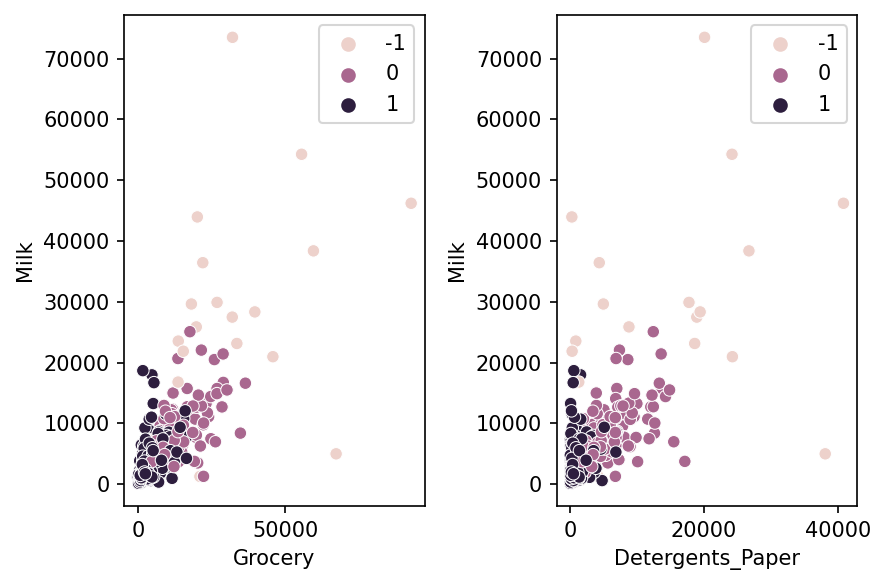

In [15]:
fig, axes = plt.subplots(1, 2, dpi=150)
sns.scatterplot(data=sales_df, x="Grocery", y="Milk", hue=dbscan_model.labels_, ax=axes[0]);
sns.scatterplot(data=sales_df, x="Detergents_Paper", y="Milk", hue=dbscan_model.labels_, ax=axes[1]);
fig.tight_layout();

In [16]:
## Let's add the labels to the dataframe

sales_df["Label"] = dbscan_model.labels_
sales_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [17]:
# Now we can calculate the mean spendt for each category

# we dont need Channel nor Region
categories = sales_df.drop(["Channel", "Region"], axis=1)
# we calculate the mean based on label
categories_mean = categories.groupby("Label").mean()
categories_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Label,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


<AxesSubplot:ylabel='Label'>

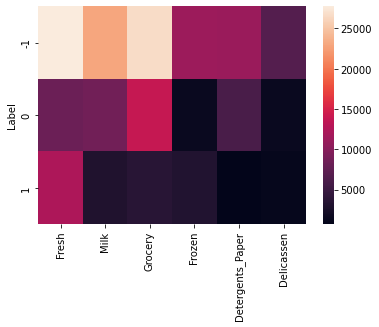

In [18]:
sns.heatmap(categories_mean)